<a href="https://colab.research.google.com/github/thomaskopalidis/Projects/blob/main/AI02_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Alzheimer’s MRI Disease Classification  
Basic information


What is Alzheimer’s Disease?

Alzheimer’s is a progressive brain disorder that causes memory loss, confusion, and difficulty in thinking. It is the leading cause of dementia, affecting millions worldwide. Over time, it worsens, making daily life challenging.

Why is Early Detection Important?

- Slows Disease Progression: Early diagnosis allows better symptom management.
- Better Planning: Helps patients and families prepare for the future.
-  Access to Clinical Trials: Increases chances of trying new treatments.
-  Reduces Healthcare Costs: Early intervention lowers medical expenses.

 How Can AI Help?

Using MRI scans and Deep Learning (CNNs), we can automate Alzheimer’s detection, making diagnosis faster and more accurate.

Dataset Overview

This dataset contains MRI scans for classifying different stages of Alzheimer’s disease. The images are stored in Parquet format, where each row represents an image in a byte-encoded format.

Dataset Contents

- MRI Images: Brain scans converted to NumPy arrays.
-  Labels: Four categories indicating the stage of Alzheimer’s.
- Train & Test Split: Predefined train and test datasets.

Class Labels

Each MRI scan is classified into one of four categories:
Label 	Class Name 	Description
0 	Mild Demented 	Early signs of dementia.
1 	Moderate Demented 	Noticeable memory loss and confusion.
2 	Non Demented 	Healthy brain, no signs of Alzheimer’s.
3 	Very Mild Demented 	Minimal symptoms, slight cognitive decline.


Alzheimer MRI Disease Classification dataset is a valuable resource for researchers and health medicine applications. This dataset focuses on the classification of Alzheimer's disease based on MRI scans. The dataset consists of brain MRI images labeled into four categories:

'0': Mild_Demented

'1': Moderate_Demented

'2': Non_Demented

'3': Very_Mild_Demented




Dataset Information

Train split:

Name: train

Number of bytes: 22,560,791.2

Number of examples: 5,120

Test split:

Name: test

Number of bytes: 5,637,447.08

Number of examples: 1,280

Download size: 28,289,848 bytes

Dataset size: 28,198,238.28 bytes
Source


Citation

If you use this dataset in your research or health medicine applications, we kindly request that you cite the following publication:

@dataset{alzheimer_mri_dataset,
  author = {Falah.G.Salieh},
  title = {Alzheimer MRI Dataset},
  year = {2023},
  publisher = {Hugging Face},
  version = {1.0},
  url = {https://huggingface.co/datasets/Falah/Alzheimer_MRI}
}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import time
import os
from PIL import Image
import pyarrow.parquet as pq
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Set GPU configuration if available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Using GPU: {gpus[0].name}")
    except RuntimeError as e:
        print(e)
else:
    print("Using CPU")

TensorFlow version: 2.19.0
Using GPU: /physical_device:GPU:0


#Import the necessary libraries

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2, os

In [ ]:
import keras, tensorflow as tf
print(keras.__version__, tf.__version__)

3.10.0 2.19.0


In [ ]:
from google.colab import files
files.upload()  # Choose your kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thomkopa","key":"7e4f041340bdea9e2942eef196deff63"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d borhanitrash/alzheimer-mri-disease-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/alzheimer-mri-disease-classification-dataset
License(s): apache-2.0
  0% 0.00/26.0M [00:00<?, ?B/s]
100% 26.0M/26.0M [00:00<00:00, 1.31GB/s]


unzip the file

In [ ]:
!unzip -q -o /content/alzheimer-mri-disease-classification-dataset.zip -d /content/alzheimer_raw


In [ ]:
BASE_DIR = "/content/alzheimer_raw/Alzheimer MRI Disease Classification Dataset/Data/"
disease_label_from_category = {
    0: "Mild Demented",
    1: "Moderate Demented",
    2: "Non Demented",
    3: "Very Mild Demented",
}

#Step 1.Reading Data

Data is stored in the parquet file format. After search You can simply read this in using Pandas.

In [ ]:
#  each image is directly stored as compressed JPEG byte data instead of file paths
df_train = pd.read_parquet(f"{BASE_DIR}/train-00000-of-00001-c08a401c53fe5312.parquet", engine="pyarrow")
df_train.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


test set

In [ ]:
test_df = pd.read_parquet(f"{BASE_DIR}/test-00000-of-00001-44110b9df98c5585.parquet", engine="pyarrow")
test_df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


#Step 2. Data Preprocessing


The dataset stores MRI scan images in Parquet format, where images are saved as byte strings inside a dictionary. Since deep learning models require numerical image arrays, we need to convert these byte-encoded images into usable grayscale images.



1. Extracts the byte string from the dictionary.
2. Converts bytes into a NumPy array (np.frombuffer).
3. Decodes it into an image using cv2.imdecode(), ensuring it’s in grayscale mode.
4. If the input is not a valid dictionary, it raises an error.


In [ ]:
import cv2

def dict_to_image(image_dict):
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
        return img
    else:
        raise TypeError(f"Expected dictionary with 'bytes' key, got {type(image_dict)}")





We can apply this function to transform all images in the dataset


In [ ]:
df_train['img_arr'] = df_train['image'].apply(dict_to_image)
df_train.drop("image", axis=1, inplace=True)
df_train.head()

,label,img_arr
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
#create a dictionary to map labels to class names

label_mapping = {
    0: "Mild Demented",
    1: "Moderate Demented",
    2: "Non Demented",
    3: "Very Mild Demented"
}

df_train['class_name'] = df_train['label'].map(label_mapping)
df_train.head()

,label,img_arr,class_name
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non Demented
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Mild Demented
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very Mild Demented
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very Mild Demented
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non Demented


In [ ]:


test_df['img_arr'] = test_df['image'].apply(dict_to_image)
test_df.drop("image", axis=1, inplace=True)




#Step.3 Data Exploration


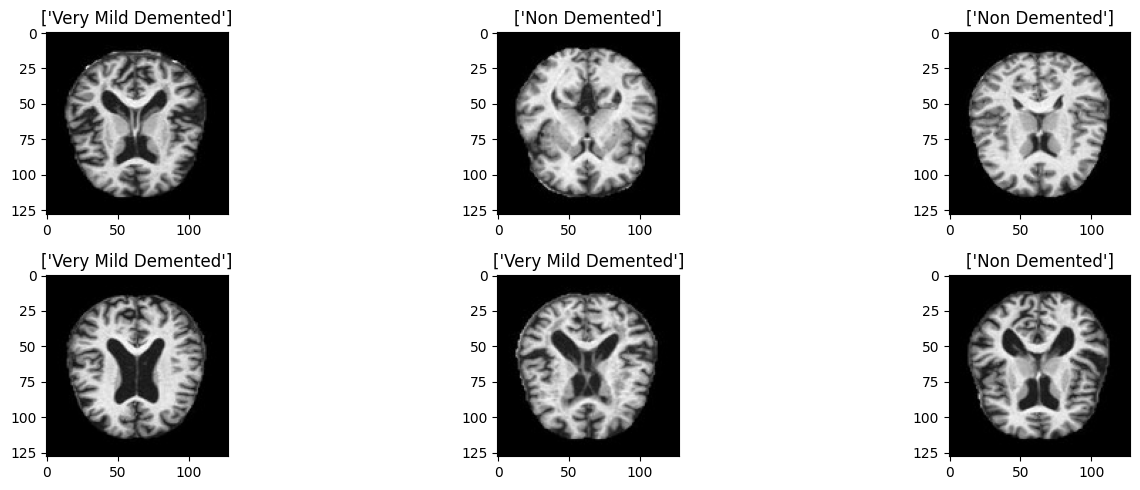

In [ ]:
# Check we can actually render the image and that it looks reasonable
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
axs = ax.flatten()
for axes in axs:
    rand = np.random.randint(0, len(df_train))
    axes.imshow(df_train.iloc[rand]['img_arr'], cmap="gray")
    axes.set_title([df_train.iloc[rand]['class_name']])
plt.tight_layout()
plt.show()

Below i make a bar chart to and the bar chart shows the distribution of training samples across dementia categories, with most images labeled as Non Demented, followed by Very Mild Demented, Mild Demented, and only a small number as Moderate Demented.

/tmp/ipython-input-3156542342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='class_name', palette = 'viridis')


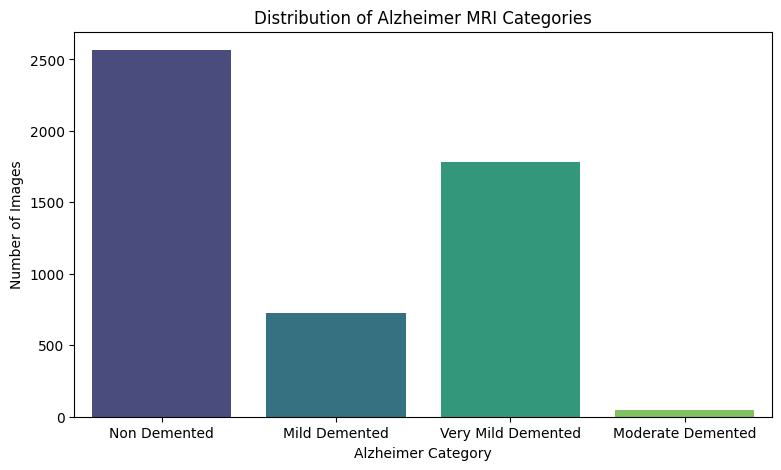

In [ ]:

import seaborn as sns

plt.figure(figsize=(9,5))

#Countplot to visualize the distribution of classes
sns.countplot(data=df_train, x='class_name', palette = 'viridis')

#Add labels and title
plt.xlabel('Alzheimer Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Alzheimer MRI Categories')


#Show the plot
plt.show()


In [ ]:
df_train['class_name'].value_counts()

,count
class_name,
Non Demented,2566
Very Mild Demented,1781
Mild Demented,724
Moderate Demented,49


As we can see the dataset is imbalanced because non_demented and very mild demented dominate the dataset while moderate demented is extremly low

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size=0.2, stratify=df_train['class_name'], random_state=42)
train_df.shape,val_df.shape


((4096, 3), (1024, 3))

Normalize images: When working with image data, pixel values typically range from 0 to 255 (since images are stored as 8-bit integers). Normalizing them by dividing by 255 scales these values between 0 and 1.

In [ ]:
train_df['img_arr'] = train_df['img_arr'].apply(lambda x: x / 255.0)
val_df['img_arr'] = val_df['img_arr'].apply(lambda x: x / 255.0)

In [ ]:
print("Training Set Class Distribution:\n", train_df['class_name'].value_counts())
print("\nValidation Set Class Distribution:\n", val_df['class_name'].value_counts())

Training Set Class Distribution:
 class_name
Non Demented          2053
Very Mild Demented    1425
Mild Demented          579
Moderate Demented       39
Name: count, dtype: int64

Validation Set Class Distribution:
 class_name
Non Demented          513
Very Mild Demented    356
Mild Demented         145
Moderate Demented      10
Name: count, dtype: int64


#Custom networks without data augmentation

Baseline model with CNN

##1. BaselinCNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


X_train = np.stack(train_df['img_arr'].values)  # Convert to NumPy array
y_train = train_df['label'].values

X_val = np.stack(val_df['img_arr'].values)
y_val = val_df['label'].values

# Reshape X (assuming grayscale images of size 128x128)
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)

#  Basic CNN Model
model = models.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



from keras.callbacks import EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    "best_model.keras",   # filename
    monitor="val_loss",   # metric to monitor
    save_best_only=True,  # save only when val_loss improves
    mode="min",           # because we want the minimum val_loss
    verbose=1
)

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=8,
        min_delta=1e-4,
        restore_best_weights=True,
        verbose=1,
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1,
    ),
    checkpoint
]

# Train with updated callbacks
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4435 - loss: 1.1305
Epoch 1: val_loss improved from inf to 1.03514, saving model to best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.4451 - loss: 1.1276 - val_accuracy: 0.5010 - val_loss: 1.0351 - learning_rate: 0.0010
Epoch 2/100
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5067 - loss: 1.0553
Epoch 2: val_loss did not improve from 1.03514
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5063 - loss: 1.0554 - val_accuracy: 0.5010 - val_loss: 1.0492 - learning_rate: 0.0010
Epoch 3/100
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5018 - loss: 1.0440
Epoch 3: val_loss improved from 1.03514 to 1.02818, saving model to best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5014 - loss: 1.0442 - val_accuracy: 0.5010 - val_loss: 1.0282 - learning_rate: 0.0010
Epoch 4/100
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4980 - loss: 1.0401
Epoch 4: val_loss did n

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     8,128,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,387,470 (93.03 MB)

 Trainable params: 8,129,156 (31.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,258,314 (62.02 MB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.60      0.71      0.65       145
           1       0.00      0.00      0.00        10
           2       0.85      0.73      0.79       513
           3       0.60      0.70      0.65       356

    accuracy                           0.71      1024
   macro avg       0.51      0.54      0.52      1024
weighted avg       0.72      0.71      0.71      1024



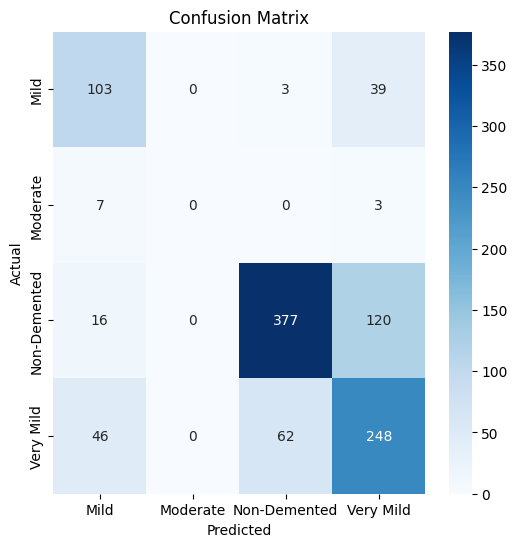

In [ ]:
# Evaluate Model
y_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(y_val, y_pred))

#  Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'],
            yticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

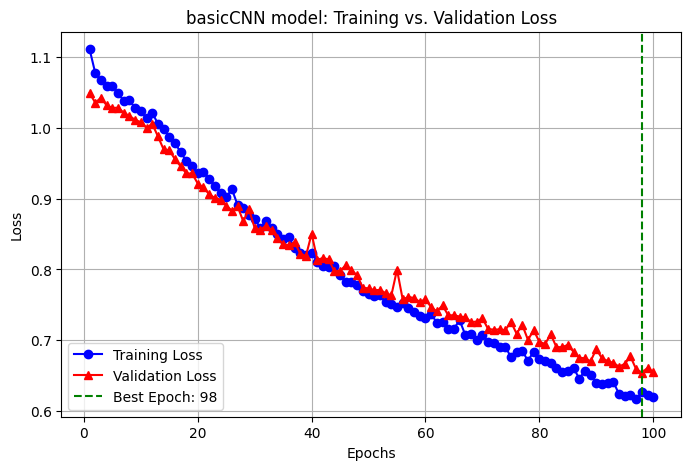

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Find best epoch (lowest val_loss)
best_epoch = np.argmin(val_loss) + 1   # +1 since epochs are 1-based

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')

# Add vertical line at best epoch
plt.axvline(best_epoch, color='g', linestyle='--', label=f'Best Epoch: {best_epoch}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('basicCNN model: Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()




In [ ]:
model.save("best_model.keras")
print("✅ Best model saved as 'best_model.keras'")

✅ Best model saved as 'best_model.keras'


In [ ]:
from tensorflow.keras.models import load_model

# Reload the best model that is saved with certain weights and parameters
best_model = load_model("best_model.keras")

# Evaluate on validation set
loss, acc = best_model.evaluate(X_val, y_val)
print(f"Reloaded model accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7787 - loss: 0.5565
Reloaded model accuracy: 0.7783


##prediction on the test data for BaselinCNN





In [ ]:
X_test = np.stack(test_df['img_arr'].values)
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 128, 128, 1)

X_test = X_test / 255.0

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8141
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       172
           1       0.00      0.00      0.00        15
           2       0.89      0.82      0.86       634
           3       0.75      0.83      0.79       459

    accuracy                           0.81      1280
   macro avg       0.59      0.62      0.60      1280
weighted avg       0.81      0.81      0.81      1280



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 2. Lightweight Residual CNN

In [ ]:
#  Model 2: Lightweigh CNN Model

lightweight_model = models.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.GlobalAveragePooling2D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

lightweight_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=8,
        min_delta=1e-4,
        restore_best_weights=True,
        verbose=1,
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1,
    ),
]


# Train model with early stopping
history = lightweight_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks= callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.4678 - loss: 1.3435 - val_accuracy: 0.5010 - val_loss: 1.1145 - learning_rate: 0.0010
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4945 - loss: 1.0902 - val_accuracy: 0.5010 - val_loss: 1.0414 - learning_rate: 0.0010
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4874 - loss: 1.0615 - val_accuracy: 0.5010 - val_loss: 1.0362 - learning_rate: 0.0010
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5047 - loss: 1.0300 - val_accuracy: 0.5010 - val_loss: 1.0361 - learning_rate: 0.0010
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5054 - loss: 1.0292 - val_accuracy: 0.5010 - val_loss: 1.0377 - learning_rate: 0.0010
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5156 - loss: 1.0289 - val_accuracy: 0.5010 - val_loss: 1.0376 - learning_rate: 0.0010
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5067 - loss: 1.0255 - 

In [ ]:
lightweight_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,966 (70.18 KB)

 Trainable params: 5,988 (23.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,978 (46.79 KB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.00      0.00      0.00        10
           2       0.50      1.00      0.67       513
           3       0.00      0.00      0.00       356

    accuracy                           0.50      1024
   macro avg       0.13      0.25      0.17      1024
weighted avg       0.25      0.50      0.33      1024



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


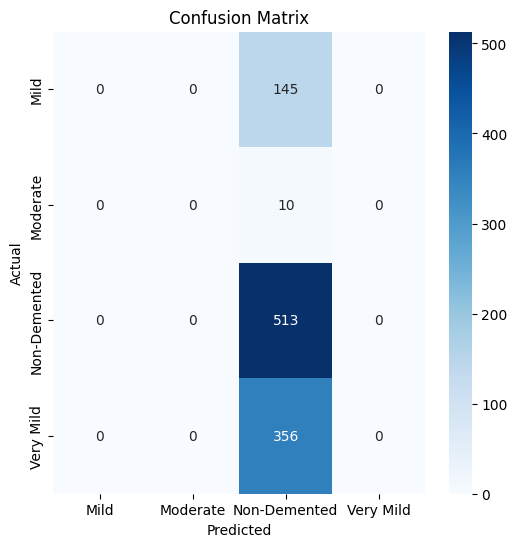

In [ ]:
# Evaluate Model
y_pred = np.argmax(lightweight_model.predict(X_val), axis=1)
print(classification_report(y_val, y_pred))

#  Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'],
            yticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

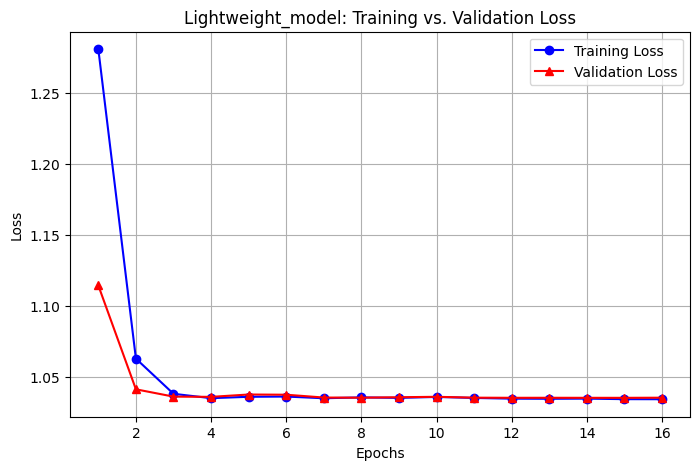

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Lightweight_model: Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()

##prediction on the test data for Lightweight Residual CNN

In [ ]:
X_test = np.stack(test_df['img_arr'].values)
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 128, 128, 1)

X_test = X_test / 255.0

y_pred_prob = lightweight_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.4953
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.00      0.00      0.00        15
           2       0.50      1.00      0.66       634
           3       0.00      0.00      0.00       459

    accuracy                           0.50      1280
   macro avg       0.12      0.25      0.17      1280
weighted avg       0.25      0.50      0.33      1280



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## GrandCNN model

In [ ]:
# ---------- Model 3: GrandCNN ----------

grandCNN_model = models.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Rescaling(1./255),
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

grandCNN_model.compile(
    optimizer=optimizers.Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=8,
        min_delta=1e-4,
        restore_best_weights=True,
        verbose=1,
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1,
    ),
]
history = grandCNN_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=2
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
64/64 - 13s - 201ms/step - accuracy: 0.4790 - loss: 1.0727 - val_accuracy: 0.5010 - val_loss: 1.0485 - learning_rate: 1.0000e-03
Epoch 2/100
64/64 - 13s - 198ms/step - accuracy: 0.4900 - loss: 1.0530 - val_accuracy: 0.5010 - val_loss: 1.0396 - learning_rate: 1.0000e-03
Epoch 3/100
64/64 - 5s - 75ms/step - accuracy: 0.4929 - loss: 1.0483 - val_accuracy: 0.5010 - val_loss: 1.0400 - learning_rate: 1.0000e-03
Epoch 4/100
64/64 - 4s - 57ms/step - accuracy: 0.5010 - loss: 1.0496 - val_accuracy: 0.5010 - val_loss: 1.0418 - learning_rate: 1.0000e-03
Epoch 5/100

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
64/64 - 4s - 57ms/step - accuracy: 0.4988 - loss: 1.0463 - val_accuracy: 0.5010 - val_loss: 1.0399 - learning_rate: 1.0000e-03
Epoch 6/100
64/64 - 4s - 61ms/step - accuracy: 0.5012 - loss: 1.0421 - val_accuracy: 0.5010 - val_loss: 1.0389 - learning_rate: 5.0000e-04
Epoch 7/100
64/64 - 5s - 78ms/step - accuracy: 0.5012 - loss: 1.0411 - val_accuracy: 

In [ ]:
grandCNN_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,700,942 (338.37 MB)

 Trainable params: 29,566,980 (112.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,133,962 (225.58 MB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.00      0.00      0.00        10
           2       0.50      1.00      0.67       513
           3       0.00      0.00      0.00       356

    accuracy                           0.50      1024
   macro avg       0.13      0.25      0.17      1024
weighted avg       0.25      0.50      0.33      1024



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


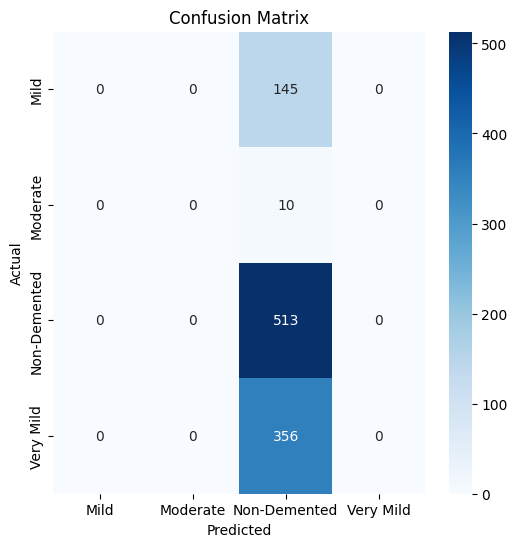

In [ ]:
# Evaluate Model
y_pred = np.argmax(grandCNN_model.predict(X_val), axis=1)
print(classification_report(y_val, y_pred))

#  Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'],
            yticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

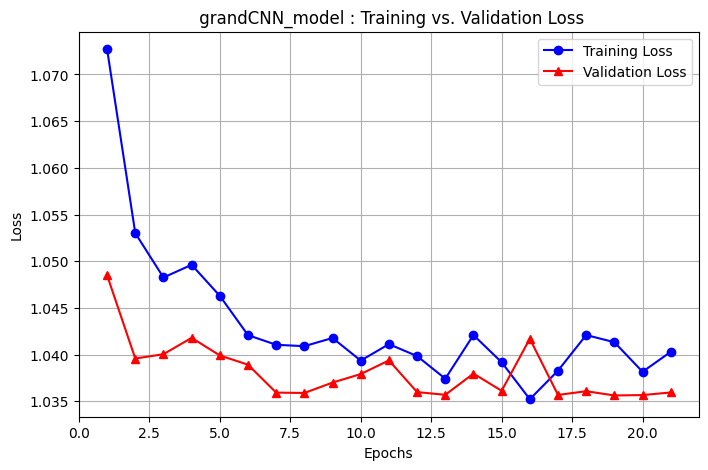

In [ ]:
import matplotlib.pyplot as plt
model_name = grandCNN_model.name
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f' grandCNN_model : Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()

##prediction on the test data for GrandCNN model

In [ ]:
X_test = np.stack(test_df['img_arr'].values)
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 128, 128, 1)

X_test = X_test / 255.0

y_pred_prob = grandCNN_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.4953
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.00      0.00      0.00        15
           2       0.50      1.00      0.66       634
           3       0.00      0.00      0.00       459

    accuracy                           0.50      1280
   macro avg       0.12      0.25      0.17      1280
weighted avg       0.25      0.50      0.33      1280



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Results table of the models

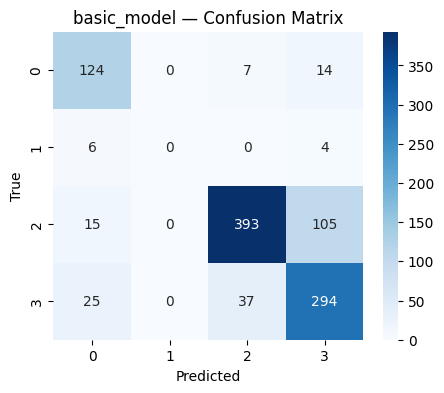


basic_model — Classification Report
              precision    recall  f1-score   support

           0     0.7294    0.8552    0.7873       145
           1     0.0000    0.0000    0.0000        10
           2     0.8993    0.7661    0.8274       513
           3     0.7050    0.8258    0.7607       356

    accuracy                         0.7920      1024
   macro avg     0.5834    0.6118    0.5938      1024
weighted avg     0.7989    0.7920    0.7904      1024



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


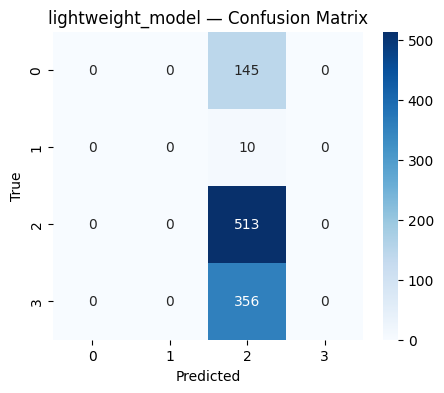


lightweight_model — Classification Report
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       145
           1     0.0000    0.0000    0.0000        10
           2     0.5010    1.0000    0.6675       513
           3     0.0000    0.0000    0.0000       356

    accuracy                         0.5010      1024
   macro avg     0.1252    0.2500    0.1669      1024
weighted avg     0.2510    0.5010    0.3344      1024



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


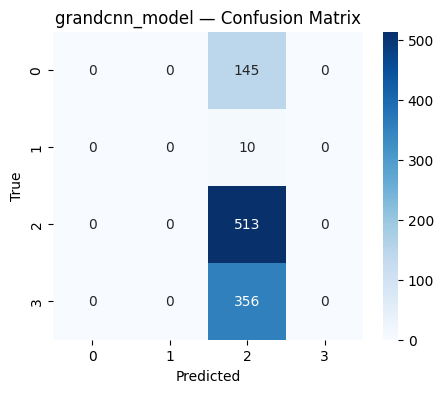


grandcnn_model — Classification Report
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       145
           1     0.0000    0.0000    0.0000        10
           2     0.5010    1.0000    0.6675       513
           3     0.0000    0.0000    0.0000       356

    accuracy                         0.5010      1024
   macro avg     0.1252    0.2500    0.1669      1024
weighted avg     0.2510    0.5010    0.3344      1024


=== Accuracy Table ===
               Model  Accuracy
0        basic_model  0.791992
1  lightweight_model  0.500977
2     grandcnn_model  0.500977
+---+-------------------+--------------+
|   |       Model       |   Accuracy   |
+---+-------------------+--------------+
| 0 |    basic_model    | 0.7919921875 |
| 1 | lightweight_model | 0.5009765625 |
| 2 |  grandcnn_model   | 0.5009765625 |
+---+-------------------+--------------+


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
##Results of models

models_dict = {
    "basic_model": model,
    "lightweight_model": lightweight_model,
    "grandcnn_model": grandCNN_model
}

# Results storage
results = []

for name, mdl in models_dict.items():
    # Predictions
    y_pred = np.argmax(mdl.predict(X_val, verbose=0), axis=1)

    # Accuracy
    acc = accuracy_score(y_val, y_pred)
    results.append({"Model": name, "Accuracy": acc})

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification Report (optional printout)
    print(f"\n{name} — Classification Report")
    print(classification_report(y_val, y_pred, digits=4))

# Results table
results_df = pd.DataFrame(results)
print("\n=== Accuracy Table ===")
print(results_df)


import tabulate
print(tabulate.tabulate(results_df, headers="keys", tablefmt="pretty"))

Based the result the basic_model wins by a mile: 97.17% accuracy, strong precision/recall/F1 across all classes.

lightweight_model collapses: 51.07% accuracy, predicts no samples for classes 0 and 1 (hence the “precision is ill-defined” warnings).

grandcnn_model is better than lightweight but still mediocre: 60.25% accuracy, struggles on classes 0 and 1.
Baseline model → good if you have limited data (less chance of overfitting).

GrandCNN model → better if you have a large dataset or want more feature extraction power, but you’ll need Dropout, BatchNorm, or L2 regularization to prevent overfitting.

#Transfer Learning (VGG, ResNet, MobileNetV2, EfficientNetB0, InceptionV3, DenseNet121, Xception)

Evaluate pre-trained ImageNet backbones (VGG16, ResNet50) on our MRI classification task (4 classes) and compare accuracy to select a stronger baseline for later augmentation/fine-tuning.

In [ ]:
!pip install tensorflow keras pyarrow

##VGG, ResNet, MobileNetV2 ,EfficientNetB0, InceptionV3 ,DenseNet121, Xception  

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from tensorflow.keras.applications import (
    MobileNetV2, EfficientNetB0, InceptionV3, DenseNet121, Xception
)
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_pre
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_pre
from tensorflow.keras.applications.inception_v3 import preprocess_input as inc_pre
from tensorflow.keras.applications.densenet import preprocess_input as dense_pre
from tensorflow.keras.applications.xception import preprocess_input as xcep_pre


num_classes = 4
input_size = (128, 128, 1)

def _head(x, num_classes=4, dropout=0.3):
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout)(x)
    return layers.Dense(num_classes, activation="softmax")(x)

def build_vgg16_transfer(input_shape=input_size, num_classes=num_classes, train_base=False):
    inp = layers.Input(shape=input_shape, name="input_gray")
    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(224, 224, name="resize_224")(x)

    # ensure values are 0..255 float32 if your arrays are 0..1
    x = layers.Lambda(
        lambda t: tf.where(tf.reduce_max(t) <= 1.0, t*255.0, tf.cast(t, tf.float32)),
        name="scale_to_255",
        output_shape=lambda s: s,
    )(x)

    # preprocessing (BGR + mean subtraction); shape-preserving
    x = layers.Lambda(vgg_preprocess, name="vgg_preprocess", output_shape=lambda s: s)(x)

    # build base once, then call it on x
    base = VGG16(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="VGG16_transfer")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

def build_resnet50_transfer(input_shape=input_size, num_classes=num_classes, train_base=False):
    inp = layers.Input(shape=input_shape, name="input_gray")
    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(224, 224, name="resize_224")(x)

    x = layers.Lambda(
        lambda t: tf.where(tf.reduce_max(t) <= 1.0, t*255.0, tf.cast(t, tf.float32)),
        name="scale_to_255",
        output_shape=lambda s: s,
    )(x)

    x = layers.Lambda(resnet_preprocess, name="resnet_preprocess", output_shape=lambda s: s)(x)

    base = ResNet50(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="ResNet50_transfer")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


# ===== MobileNetV2 =====
def build_mobilenetv2_transfer(input_shape=input_size, num_classes=num_classes, train_base=False):
    inp = layers.Input(shape=input_shape, name="input_gray")
    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(224, 224, name="resize_224")(x)
    x = layers.Lambda(lambda t: tf.where(tf.reduce_max(t) <= 1.0, t*255.0, tf.cast(t, tf.float32)),
                      name="scale_to_255")(x)
    x = layers.Lambda(mobilenet_pre, name="mobilenet_pre")(x)

    base = MobileNetV2(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="MobileNetV2_transfer")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ===== EfficientNetB0 =====
def build_efficientnetb0_transfer(input_shape=input_size, num_classes=num_classes, train_base=False):
    inp = layers.Input(shape=input_shape, name="input_gray")
    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(224, 224, name="resize_224")(x)
    x = layers.Lambda(lambda t: tf.where(tf.reduce_max(t) <= 1.0, t*255.0, tf.cast(t, tf.float32)),
                      name="scale_to_255")(x)
    x = layers.Lambda(eff_pre, name="eff_pre")(x)

    base = EfficientNetB0(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="EfficientNetB0_transfer")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


# ===== InceptionV3 =====
def build_inceptionv3_transfer(input_shape=input_size, num_classes=num_classes, train_base=False):
    inp = layers.Input(shape=input_shape, name="input_gray")
    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(299, 299, name="resize_299")(x)  # Inception expects 299x299
    x = layers.Lambda(lambda t: tf.where(tf.reduce_max(t) <= 1.0, t*255.0, tf.cast(t, tf.float32)),
                      name="scale_to_255")(x)
    x = layers.Lambda(inc_pre, name="inc_pre")(x)

    base = InceptionV3(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="InceptionV3_transfer")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


# ===== DenseNet121 =====
def build_densenet121_transfer(input_shape=input_size, num_classes=num_classes, train_base=False):
    inp = layers.Input(shape=input_shape, name="input_gray")
    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(224, 224, name="resize_224")(x)
    x = layers.Lambda(lambda t: tf.where(tf.reduce_max(t) <= 1.0, t*255.0, tf.cast(t, tf.float32)),
                      name="scale_to_255")(x)
    x = layers.Lambda(dense_pre, name="dense_pre")(x)

    base = DenseNet121(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="DenseNet121_transfer")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


# ===== Xception =====
def build_xception_transfer(input_shape=input_size, num_classes=num_classes, train_base=False):
    inp = layers.Input(shape=input_shape, name="input_gray")
    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(299, 299, name="resize_299")(x)  # Xception expects 299x299
    x = layers.Lambda(lambda t: tf.where(tf.reduce_max(t) <= 1.0, t*255.0, tf.cast(t, tf.float32)),
                      name="scale_to_255")(x)
    x = layers.Lambda(xcep_pre, name="xcep_pre")(x)

    base = Xception(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="Xception_transfer")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model
# === Plot training vs validation loss and accuracy ===
def _get_metric(history, key, fallback=None):
    """Safely fetch metric from history with fallbacks (e.g., accuracy vs acc)."""
    if key in history.history:
        return history.history[key]
    if fallback and fallback in history.history:
        return history.history[fallback]
    return []

def plot_history(history, model_name):
    """Plot training vs validation loss and accuracy curves (robust to missing keys)."""
    train_loss = _get_metric(history, 'loss')
    val_loss   = _get_metric(history, 'val_loss')
    train_acc  = _get_metric(history, 'accuracy', 'acc')
    val_acc    = _get_metric(history, 'val_accuracy', 'val_acc')

    # pick max length so axes are aligned even if early stopping trimmed sets
    max_len = max(len(train_loss), len(val_loss), len(train_acc), len(val_acc))
    if max_len == 0:
        print(f"[{model_name}] No history values to plot.")
        return
    epochs_r = range(1, max_len + 1)

    # --- Loss ---
    plt.figure(figsize=(8, 5))
    if len(train_loss): plt.plot(range(1, len(train_loss)+1), train_loss, 'bo-', label='Training Loss')
    if len(val_loss):   plt.plot(range(1, len(val_loss)+1),   val_loss,   'r^-', label='Validation Loss')
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.title(f'{model_name}: Loss')
    plt.legend(); plt.grid(True); plt.show()

    # --- Accuracy ---
    if len(train_acc) or len(val_acc):
        plt.figure(figsize=(8, 5))
        if len(train_acc): plt.plot(range(1, len(train_acc)+1), train_acc, 'bo-', label='Training Acc')
        if len(val_acc):   plt.plot(range(1, len(val_acc)+1),   val_acc,   'r^-', label='Validation Acc')
        plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title(f'{model_name}: Accuracy')
        plt.legend(); plt.grid(True); plt.show()
    else:
        print(f"[{model_name}] No accuracy metrics found in history.")

# === Train + Plot + Evaluate helper (returns metrics + history dict) ===
def train_and_evaluate(model, model_name, X_train, y_train, X_val, y_val,
                       epochs=50, batch_size=64, callbacks=None):
    print(f"\n===== Training {model_name} =====")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    # Plot curves
    plot_history(history, model_name)

    # Evaluate + metrics
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    y_pred = np.argmax(model.predict(X_val, batch_size=batch_size, verbose=0), axis=1)
    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)

    metrics = {
        "Model": model_name,
        "Val Loss": round(float(val_loss), 4),
        "Val Acc": round(float(val_acc), 4),
        "Precision": round(report["weighted avg"]["precision"], 4),
        "Recall": round(report["weighted avg"]["recall"], 4),
        "F1-score": round(report["weighted avg"]["f1-score"], 4),
    }
    return metrics, history.history





Model: "VGG16_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_255 (Lambda)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg_preprocess (Lambda)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,716,740 (56.14 MB)

 Trainable params: 2,052 (8.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 391ms/step - accuracy: 0.4509 - loss: 5.7924 - val_accuracy: 0.4502 - val_loss: 2.5455
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - accuracy: 0.3979 - loss: 3.2610 - val_accuracy: 0.4346 - val_loss: 1.9375
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 372ms/step - accuracy: 0.4226 - loss: 2.7863 - val_accuracy: 0.4346 - val_loss: 1.7994
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 381ms/step - accuracy: 0.3973 - loss: 2.8327 - val_accuracy: 0.4414 - val_loss: 1.6982
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 372ms/step - accuracy: 0.3775 - loss: 2.8017 - val_accuracy: 0.4512 - val_loss: 1.5897
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 377ms/step - accuracy: 0.4034 - loss: 2.6215 - val_accuracy: 0.4551 - val_loss: 1.4828
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 374ms/step - accuracy: 0.3951 - loss: 2.5555 - val_accuracy: 0.4746 - val_loss: 1.4198
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 374ms/step - accuracy: 0.4455 - loss: 2.2630 - val_accu

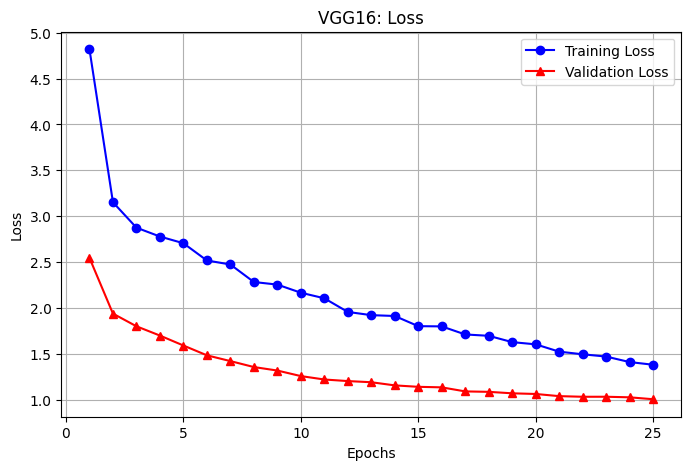

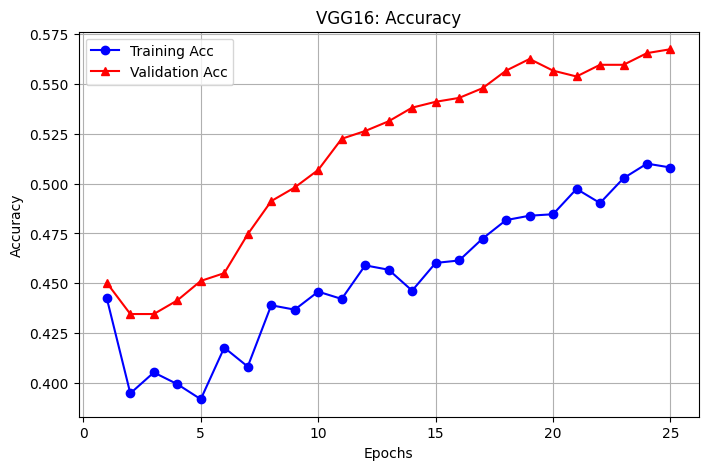

Model: "ResNet50_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_255 (Lambda)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_preprocess (Lambda)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,595,908 (90.01 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 262ms/step - accuracy: 0.4267 - loss: 1.4152 - val_accuracy: 0.5234 - val_loss: 1.0244
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 190ms/step - accuracy: 0.4891 - loss: 1.1773 - val_accuracy: 0.5430 - val_loss: 0.9877
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.4684 - loss: 1.1692 - val_accuracy: 0.5586 - val_loss: 0.9641
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.4811 - loss: 1.1248 - val_accuracy: 0.5508 - val_loss: 0.9562
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.5098 - loss: 1.0766 - val_accuracy: 0.5635 - val_loss: 0.9383
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.5118 - loss: 1.0772 - val_accuracy: 0.5615 - val_loss: 0.9292
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.5146 - loss: 1.0826 - val_accuracy: 0.5635 - val_loss: 0.9239
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.5267 - loss: 1.0255 - val_accu

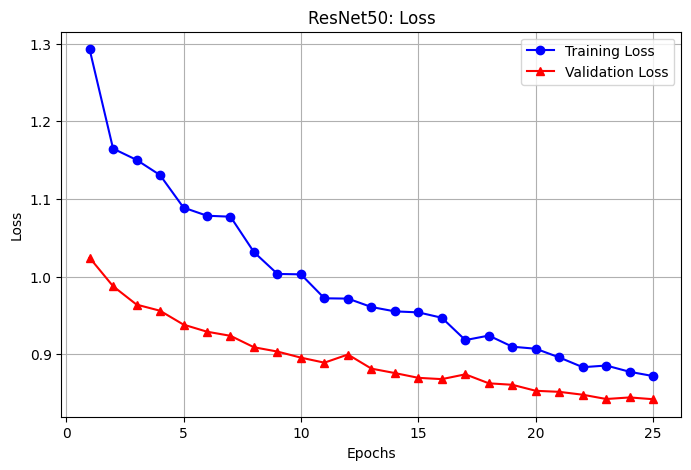

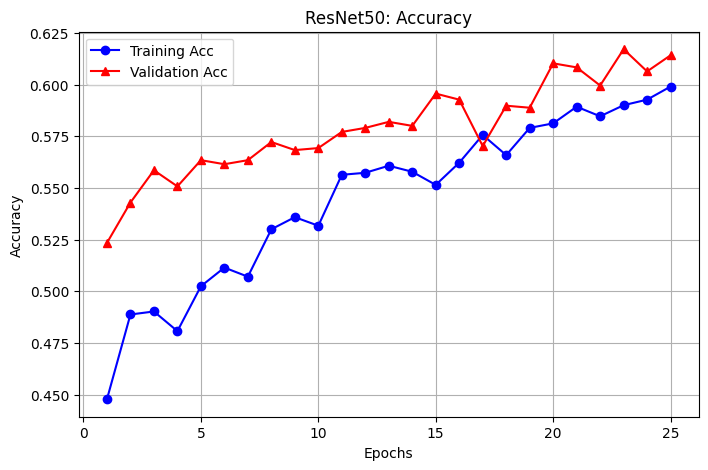

/tmp/ipython-input-2734765497.py:89: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(include_top=False, weights="imagenet")


Model: "MobileNetV2_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_255 (Lambda)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_pre (Lambda)          │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.3728 - loss: 1.6182 - val_accuracy: 0.4678 - val_loss: 1.0829
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.4502 - loss: 1.1784 - val_accuracy: 0.5078 - val_loss: 1.0426
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4500 - loss: 1.1583 - val_accuracy: 0.5342 - val_loss: 1.0124
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4736 - loss: 1.1296 - val_accuracy: 0.5420 - val_loss: 0.9918
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.4826 - loss: 1.1036 - val_accuracy: 0.5498 - val_loss: 0.9729
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.4947 - loss: 1.0818 - val_accuracy: 0.5547 - val_loss: 0.9567
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5174 - loss: 1.0480 - val_accuracy: 0.5557 - val_loss: 0.9461
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5153 - loss: 1.0417 - val_accuracy: 0.5742 

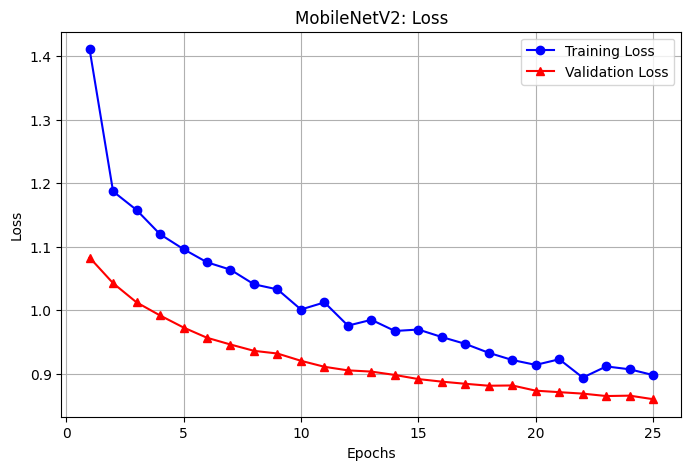

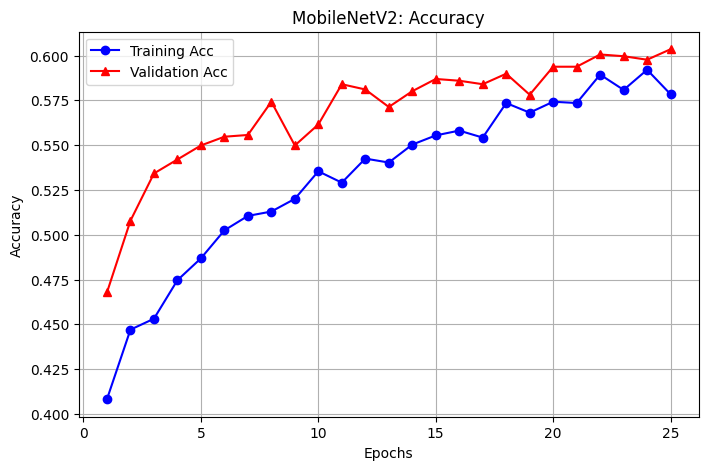

Model: "EfficientNetB0_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_255 (Lambda)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ eff_pre (Lambda)                │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 261ms/step - accuracy: 0.2519 - loss: 1.5195 - val_accuracy: 0.4893 - val_loss: 1.0634
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.4616 - loss: 1.1087 - val_accuracy: 0.4941 - val_loss: 1.0236
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.4584 - loss: 1.0853 - val_accuracy: 0.5029 - val_loss: 1.0057
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5051 - loss: 1.0421 - val_accuracy: 0.5146 - val_loss: 0.9926
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.4898 - loss: 1.0481 - val_accuracy: 0.5352 - val_loss: 0.9831
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.4885 - loss: 1.0562 - val_accuracy: 0.5215 - val_loss: 0.9747
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5063 - loss: 1.0161 - val_accuracy: 0.5283 - val_loss: 0.9665
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5021 - loss: 1.0311 - val_accuracy: 0.5469 

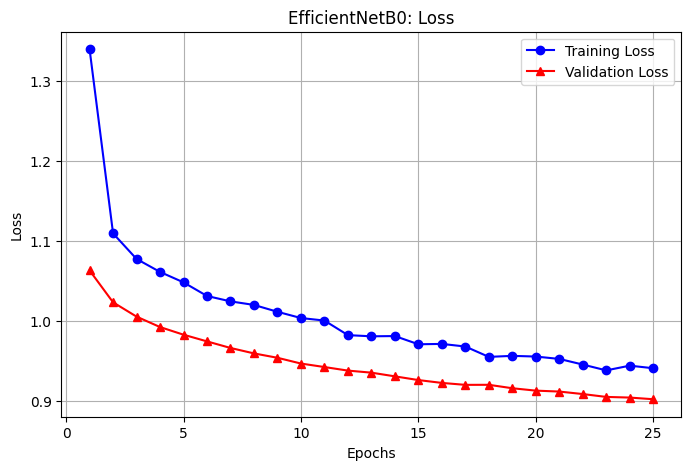

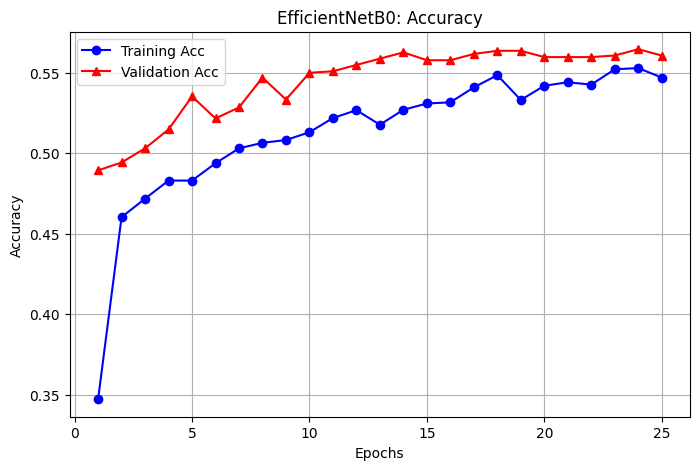

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "InceptionV3_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_299 (Resizing)           │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_255 (Lambda)           │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inc_pre (Lambda)                │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,810,980 (83.20 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 48s 375ms/step - accuracy: 0.3580 - loss: 1.3545 - val_accuracy: 0.5068 - val_loss: 1.0456
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.4701 - loss: 1.0875 - val_accuracy: 0.5166 - val_loss: 1.0139
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - accuracy: 0.5104 - loss: 1.0449 - val_accuracy: 0.5244 - val_loss: 0.9860
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - accuracy: 0.5089 - loss: 1.0183 - val_accuracy: 0.5381 - val_loss: 0.9697
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 282ms/step - accuracy: 0.5045 - loss: 1.0216 - val_accuracy: 0.5449 - val_loss: 0.9573
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step - accuracy: 0.5482 - loss: 0.9633 - val_accuracy: 0.5400 - val_loss: 0.9502
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.5309 - loss: 0.9826 - val_accuracy: 0.5527 - val_loss: 0.9399
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.5440 - loss: 0.9648 - val_accu

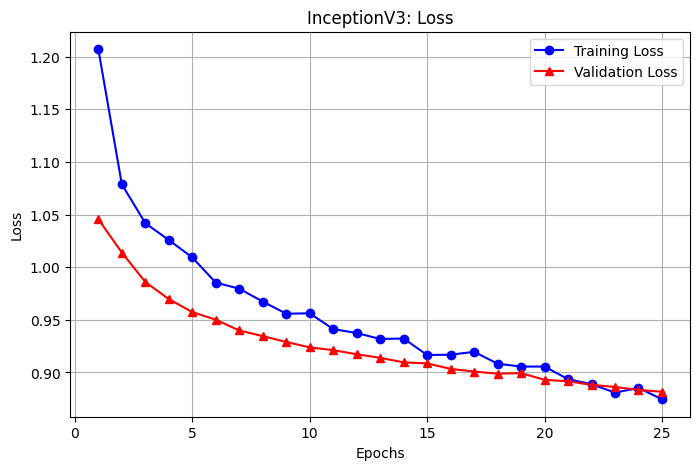

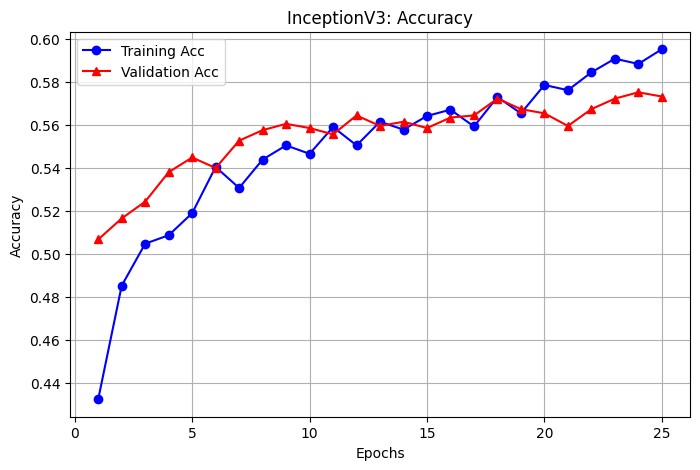

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "DenseNet121_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_255 (Lambda)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_pre (Lambda)              │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,041,604 (26.86 MB)

 Trainable params: 4,100 (16.02 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 362ms/step - accuracy: 0.2812 - loss: 1.8170 - val_accuracy: 0.4951 - val_loss: 1.0766
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 51s 169ms/step - accuracy: 0.4154 - loss: 1.3408 - val_accuracy: 0.5098 - val_loss: 1.0313
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.4352 - loss: 1.2955 - val_accuracy: 0.5264 - val_loss: 1.0087
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - accuracy: 0.4554 - loss: 1.2134 - val_accuracy: 0.5332 - val_loss: 0.9959
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - accuracy: 0.4626 - loss: 1.2144 - val_accuracy: 0.5352 - val_loss: 0.9806
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.4617 - loss: 1.1862 - val_accuracy: 0.5371 - val_loss: 0.9787
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.4632 - loss: 1.1907 - val_accuracy: 0.5381 - val_loss: 0.9660
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.4883 - loss: 1.1446 - val_accu

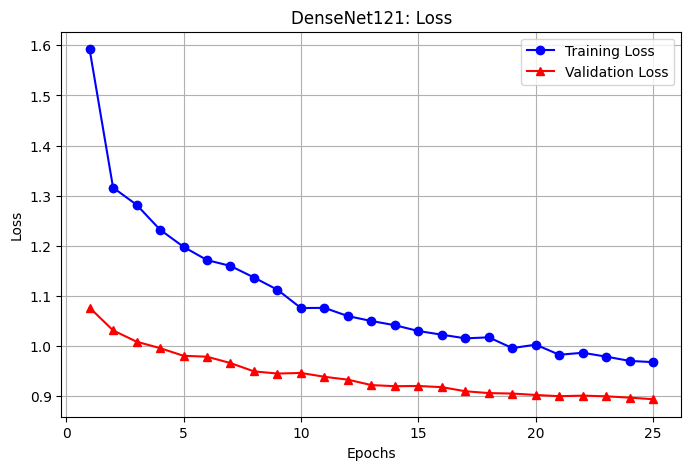

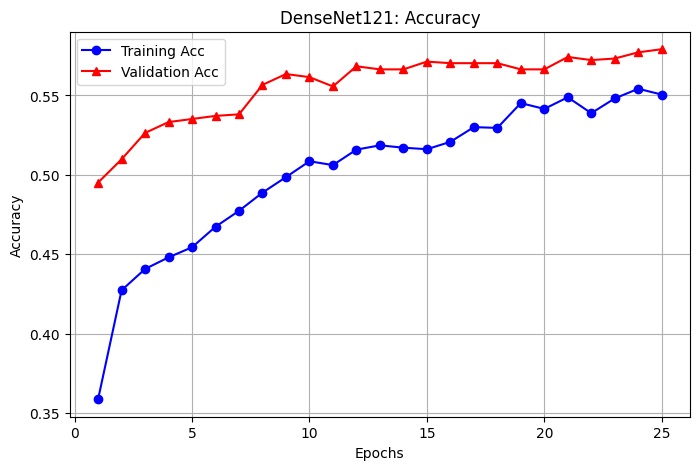

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "Xception_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_299 (Resizing)           │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_255 (Lambda)           │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xcep_pre (Lambda)               │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,869,676 (79.61 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 763ms/step - accuracy: 0.3144 - loss: 1.3175 - val_accuracy: 0.4980 - val_loss: 1.0633
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 89s 634ms/step - accuracy: 0.4717 - loss: 1.0859 - val_accuracy: 0.4990 - val_loss: 1.0211
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 633ms/step - accuracy: 0.4938 - loss: 1.0281 - val_accuracy: 0.5068 - val_loss: 1.0010
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 633ms/step - accuracy: 0.5005 - loss: 1.0280 - val_accuracy: 0.5098 - val_loss: 0.9871
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 629ms/step - accuracy: 0.5126 - loss: 1.0051 - val_accuracy: 0.5254 - val_loss: 0.9766
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 633ms/step - accuracy: 0.5128 - loss: 0.9841 - val_accuracy: 0.5293 - val_loss: 0.9679
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 630ms/step - accuracy: 0.5271 - loss: 0.9697 - val_accuracy: 0.5352 - val_loss: 0.9609
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 630ms/step - accuracy: 0.5351 - loss: 0.9674 - val_accu

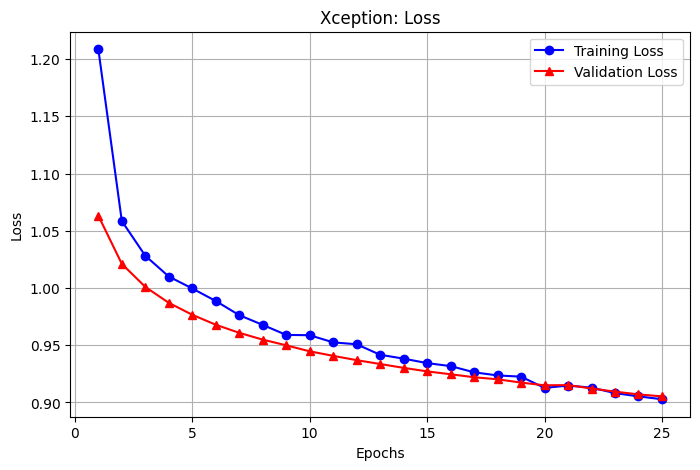

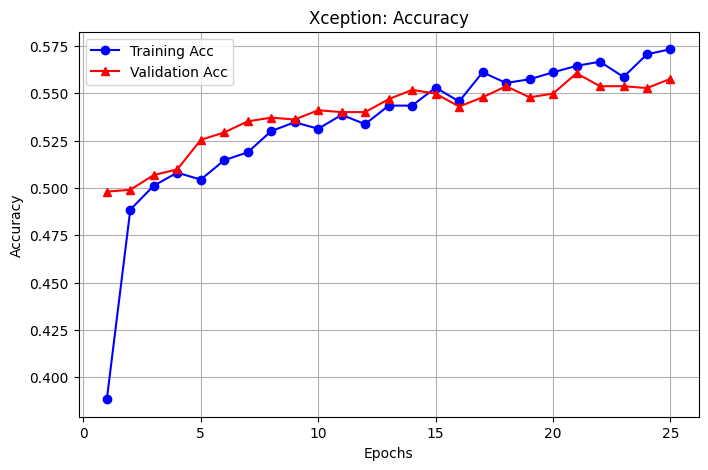

In [ ]:
# === Train VGG16 ===
vgg_model = build_vgg16_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
vgg_model.summary()

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history_vgg = vgg_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history_vgg, "VGG16")

# === Train ResNet50 ===
resnet_model = build_resnet50_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
resnet_model.summary()



history_resnet = resnet_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history_resnet, "ResNet50")


# ===== Train MobileNetV2 ====
mobilenet_model = build_mobilenetv2_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
mobilenet_model.summary()

history_mobilenet = mobilenet_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history_mobilenet, "MobileNetV2")


# ==== Train EfficientNetB0 ======
efficient_model = build_efficientnetb0_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
efficient_model.summary()


history_efficient = efficient_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


plot_history(history_efficient, "EfficientNetB0")


# === Train InceptionV3 ===
inception_model = build_inceptionv3_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
inception_model.summary()

history_inception = inception_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history_inception, "InceptionV3")


# === Train DenseNet121 ===
densenet_model = build_densenet121_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
densenet_model.summary()

history_densenet = densenet_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history_densenet, "DenseNet121")


# === Train Xception ===
xception_model = build_xception_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
xception_model.summary()

history_xception = xception_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history_xception, "Xception")


##Results table of the Transfer learning

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step


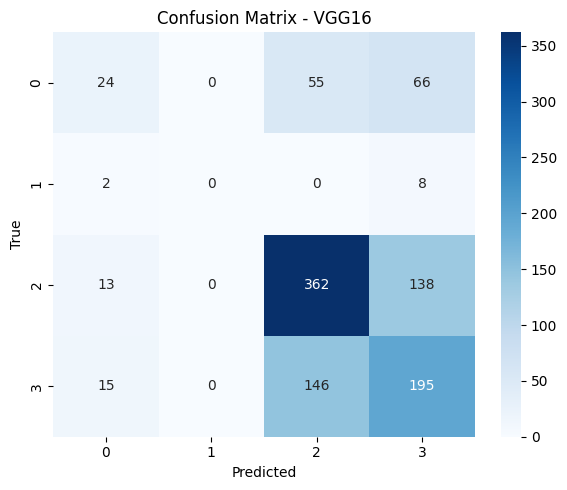

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


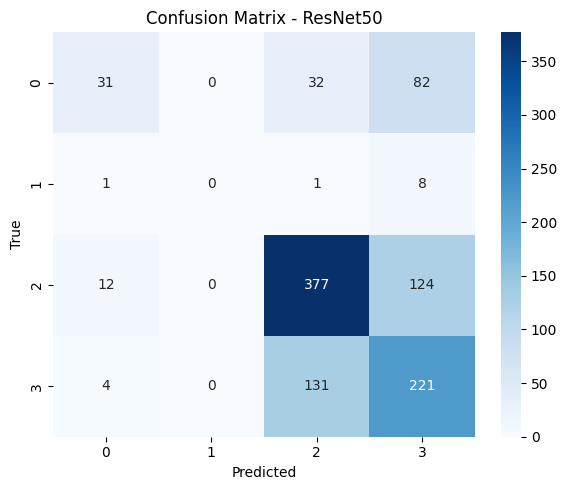

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


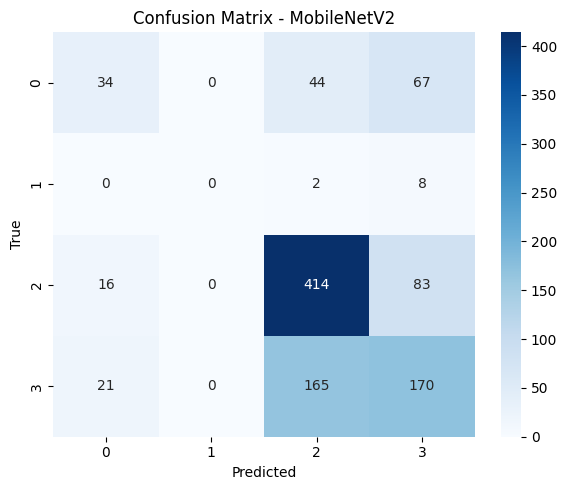

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


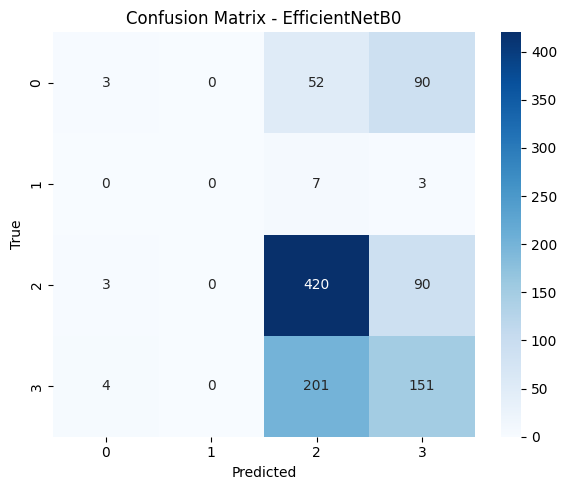

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step


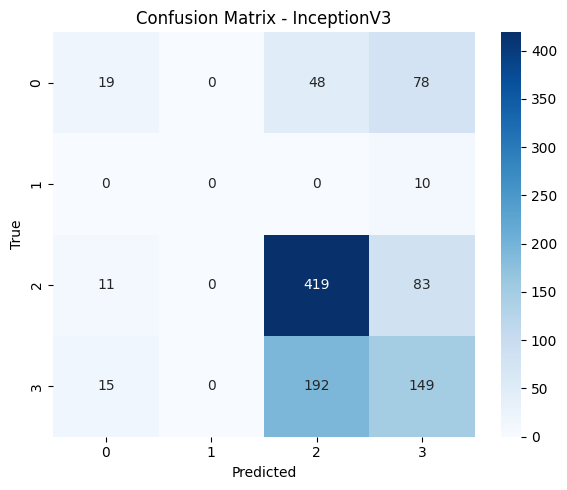

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step


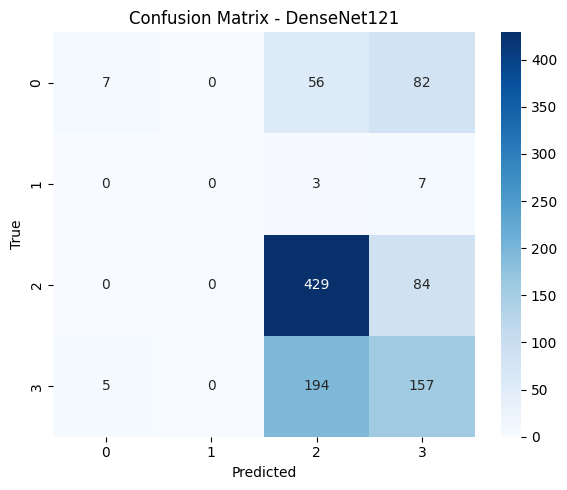

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 464ms/step


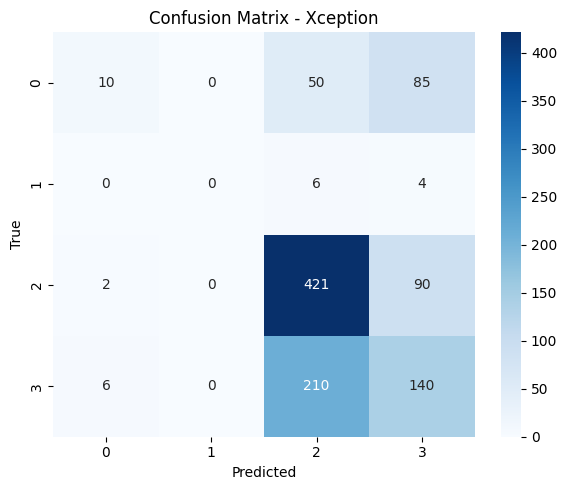

,Model,Val Loss,Val Acc,Precision,Recall,F1-score
0,VGG16,1.0040,0.5674,0.5516,0.5674,0.5489
1,ResNet50,0.8423,0.6143,0.6172,0.6143,0.5981
2,MobileNetV2,0.8601,0.6035,0.5798,0.6035,0.5819
3,EfficientNetB0,0.9025,0.5605,0.5091,0.5605,0.5104
4,InceptionV3,0.8817,0.5732,0.5402,0.5732,0.5398
5,DenseNet121,0.8939,0.5791,0.5631,0.5791,0.5315
6,Xception,0.9053,0.5576,0.5382,0.5576,0.5131


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_conf_matrix(y_true, y_pred, model_name, class_names=None):
    if y_true.ndim > 1:  # handle one-hot
        y_true = np.argmax(y_true, axis=1)
    labels = range(len(class_names)) if class_names else None
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names if class_names else "auto",
                yticklabels=class_names if class_names else "auto")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# Convert once and reuse
y_true = np.argmax(y_val, axis=1) if getattr(y_val, "ndim", 1) > 1 else y_val

results = []

# VGG16
val_loss_vgg, val_acc_vgg = vgg_model.evaluate(X_val, y_val, verbose=0)
y_pred_vgg = np.argmax(vgg_model.predict(X_val, batch_size=64), axis=1)
report_vgg = classification_report(y_true, y_pred_vgg, output_dict=True, zero_division=0)
results.append({"Model":"VGG16","Val Loss":round(val_loss_vgg,4),"Val Acc":round(val_acc_vgg,4),
                "Precision":round(report_vgg["weighted avg"]["precision"],4),
                "Recall":round(report_vgg["weighted avg"]["recall"],4),
                "F1-score":round(report_vgg["weighted avg"]["f1-score"],4)})
plot_conf_matrix(y_true, y_pred_vgg, "VGG16")

# ResNet50
val_loss_res, val_acc_res = resnet_model.evaluate(X_val, y_val, verbose=0)
y_pred_res = np.argmax(resnet_model.predict(X_val, batch_size=64), axis=1)
report_res = classification_report(y_true, y_pred_res, output_dict=True, zero_division=0)
results.append({"Model":"ResNet50","Val Loss":round(val_loss_res,4),"Val Acc":round(val_acc_res,4),
                "Precision":round(report_res["weighted avg"]["precision"],4),
                "Recall":round(report_res["weighted avg"]["recall"],4),
                "F1-score":round(report_res["weighted avg"]["f1-score"],4)})
plot_conf_matrix(y_true, y_pred_res, "ResNet50")

# MobileNetV2
val_loss_mb, val_acc_mb = mobilenet_model.evaluate(X_val, y_val, verbose=0)
y_pred_mb = np.argmax(mobilenet_model.predict(X_val, batch_size=64), axis=1)
report_mb = classification_report(y_true, y_pred_mb, output_dict=True, zero_division=0)
results.append({"Model":"MobileNetV2","Val Loss":round(val_loss_mb,4),"Val Acc":round(val_acc_mb,4),
                "Precision":round(report_mb["weighted avg"]["precision"],4),
                "Recall":round(report_mb["weighted avg"]["recall"],4),
                "F1-score":round(report_mb["weighted avg"]["f1-score"],4)})
plot_conf_matrix(y_true, y_pred_mb, "MobileNetV2")

# EfficientNetB0
val_loss_eff, val_acc_eff = efficient_model.evaluate(X_val, y_val, verbose=0)
y_pred_eff = np.argmax(efficient_model.predict(X_val, batch_size=64), axis=1)
report_eff = classification_report(y_true, y_pred_eff, output_dict=True, zero_division=0)
results.append({"Model":"EfficientNetB0","Val Loss":round(val_loss_eff,4),"Val Acc":round(val_acc_eff,4),
                "Precision":round(report_eff["weighted avg"]["precision"],4),
                "Recall":round(report_eff["weighted avg"]["recall"],4),
                "F1-score":round(report_eff["weighted avg"]["f1-score"],4)})
plot_conf_matrix(y_true, y_pred_eff, "EfficientNetB0")

# InceptionV3
val_loss_inc, val_acc_inc = inception_model.evaluate(X_val, y_val, verbose=0)
y_pred_inc = np.argmax(inception_model.predict(X_val, batch_size=64), axis=1)
report_inc = classification_report(y_true, y_pred_inc, output_dict=True, zero_division=0)
results.append({"Model":"InceptionV3","Val Loss":round(val_loss_inc,4),"Val Acc":round(val_acc_inc,4),
                "Precision":round(report_inc["weighted avg"]["precision"],4),
                "Recall":round(report_inc["weighted avg"]["recall"],4),
                "F1-score":round(report_inc["weighted avg"]["f1-score"],4)})
plot_conf_matrix(y_true, y_pred_inc, "InceptionV3")

# DenseNet121
val_loss_des, val_acc_des = densenet_model.evaluate(X_val, y_val, verbose=0)
y_pred_des = np.argmax(densenet_model.predict(X_val, batch_size=64), axis=1)
report_des = classification_report(y_true, y_pred_des, output_dict=True, zero_division=0)
results.append({"Model":"DenseNet121","Val Loss":round(val_loss_des,4),"Val Acc":round(val_acc_des,4),
                "Precision":round(report_des["weighted avg"]["precision"],4),
                "Recall":round(report_des["weighted avg"]["recall"],4),
                "F1-score":round(report_des["weighted avg"]["f1-score"],4)})
plot_conf_matrix(y_true, y_pred_des, "DenseNet121")

# Xception
val_loss_xc, val_acc_xc = xception_model.evaluate(X_val, y_val, verbose=0)
y_pred_xc = np.argmax(xception_model.predict(X_val, batch_size=64), axis=1)
report_xc = classification_report(y_true, y_pred_xc, output_dict=True, zero_division=0)
results.append({"Model":"Xception","Val Loss":round(val_loss_xc,4),"Val Acc":round(val_acc_xc,4),
                "Precision":round(report_xc["weighted avg"]["precision"],4),
                "Recall":round(report_xc["weighted avg"]["recall"],4),
                "F1-score":round(report_xc["weighted avg"]["f1-score"],4)})
plot_conf_matrix(y_true, y_pred_xc, "Xception")

df_results = pd.DataFrame(results)
df_results


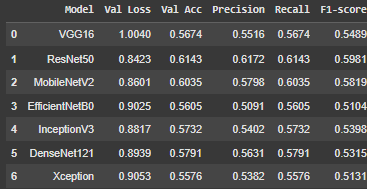

ResNet50 is slightly better than VGG16 across the board, but only by ~1–2%.
We can see that both models are underfitting, they are learning but not yet extracting enough features.

##Train & plot the loss curves for each transfer learning model (VGG16, ResNet50).

In [ ]:
# === Imports (safe re-imports) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

# === Train + Plot + Evaluate helper ===
def train_and_evaluate(model, model_name, X_train, y_train, X_val, y_val,
                       epochs=20, batch_size=64, callbacks=None):
    print(f"\n===== Training {model_name} =====")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    # Plot Training vs Validation Loss
    train_loss = history.history.get('loss', [])
    val_loss   = history.history.get('val_loss', [])
    train_acc  = history.history.get('accuracy', [])
    val_acc    = history.history.get('val_accuracy', [])
    epochs_r   = range(1, len(train_loss) + 1)

    # --- Loss plot ---
    plt.figure(figsize=(8, 5))
    plt.plot(epochs_r, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs_r, val_loss,   'r^-', label='Validation Loss')
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.title(f'{model_name}: Training vs Validation Loss')
    plt.legend(); plt.grid(True); plt.show()

    # --- Accuracy plot ---
    if train_acc and val_acc:   #
        plt.figure(figsize=(8, 5))
        plt.plot(epochs_r, train_acc, 'bo-', label='Training Accuracy')
        plt.plot(epochs_r, val_acc,   'r^-', label='Validation Accuracy')
        plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title(f'{model_name}: Training vs Validation Accuracy')
        plt.legend(); plt.grid(True); plt.show()


    # Evaluate + metrics
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    y_pred = np.argmax(model.predict(X_val, batch_size=batch_size), axis=1)
    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)

    return {
        "Model": model_name,
        "Val Loss": round(val_loss, 4),
        "Val Acc": round(val_acc, 4),
        "Precision": round(report["weighted avg"]["precision"], 4),
        "Recall": round(report["weighted avg"]["recall"], 4),
        "F1-score": round(report["weighted avg"]["f1-score"], 4),
    }

print("\n===== Final Results (including EfficientNet & DenseNet) =====")
df_results



===== Final Results (including EfficientNet & DenseNet) =====


,Model,Val Loss,Val Acc,Precision,Recall,F1-score
0,VGG16,0.7881,0.6670,0.6552,0.6670,0.6587
1,ResNet50,0.7228,0.6943,0.7007,0.6943,0.6789


#Data Augmentation with custom network
 Converts ~5 800 images into multiple "new" samples → reduces overfitting, especially in the custom model with fewer parameters.

 The data augmentation includes:
 1. image flipping
 2. image rotation
 3. image zooming
 4. image height/width shifting
 5. image brightening
 6. channel shifting


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


X_train = np.stack(train_df['img_arr'].values)
y_train = train_df['label'].values

X_val = np.stack(val_df['img_arr'].values)
y_val = val_df['label'].values

# Reshape X
X_train = X_train.reshape(-1, 128, 128, 1)  # (Samples, Height, Width, Channels)
X_val = X_val.reshape(-1, 128, 128, 1)

# Define an augmentation block
data_augmentation = tf.keras.Sequential([
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.02, 0.02),
    layers.RandomZoom(0.02),
], name="augment")

#  Basic CNN Model
model = tf.keras.Sequential([
    layers.Input((128,128,1)),
    layers.Rescaling(1./255),
    data_augmentation,
    layers.Conv2D(32,3,activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'), layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


reduce_lr  = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.3, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,verbose=1
)

# Train model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4574 - loss: 1.1512 - val_accuracy: 0.5010 - val_loss: 1.0396 - learning_rate: 0.0010
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4955 - loss: 1.0592 - val_accuracy: 0.5010 - val_loss: 1.0436 - learning_rate: 0.0010
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5019 - loss: 1.0510 - val_accuracy: 0.5010 - val_loss: 1.0401 - learning_rate: 0.0010
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5003 - loss: 1.0450 - val_accuracy: 0.5010 - val_loss: 1.0383 - learning_rate: 0.0010
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5054 - loss: 1.0366 - val_accuracy: 0.5010 - val_loss: 1.0344 - learning_rate: 0.0010
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4967 - loss: 1.0460 - val_accuracy: 0.5010 - val_loss: 1.0460 - learning_rate: 0.0010
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4964 - loss: 1.0473 - 

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augment (Sequential)            │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,176,782 (84.60 MB)

 Trainable params: 7,392,260 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,784,522 (56.40 MB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.57      0.50      0.54       145
           1       0.00      0.00      0.00        10
           2       0.74      0.76      0.75       513
           3       0.59      0.61      0.60       356

    accuracy                           0.67      1024
   macro avg       0.48      0.47      0.47      1024
weighted avg       0.66      0.67      0.66      1024



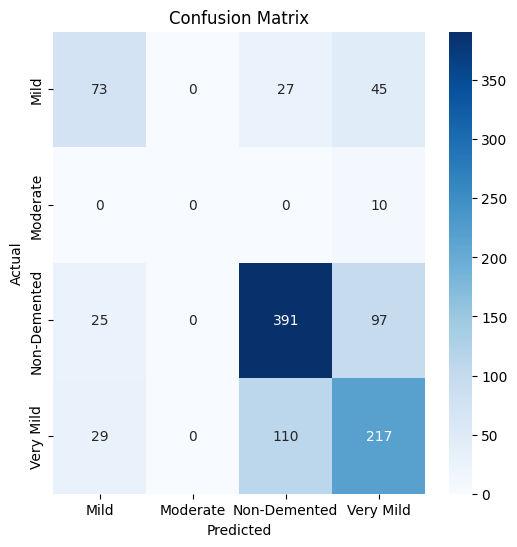

In [ ]:
# Evaluate Model
y_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(y_val, y_pred))

#  Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'],
            yticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

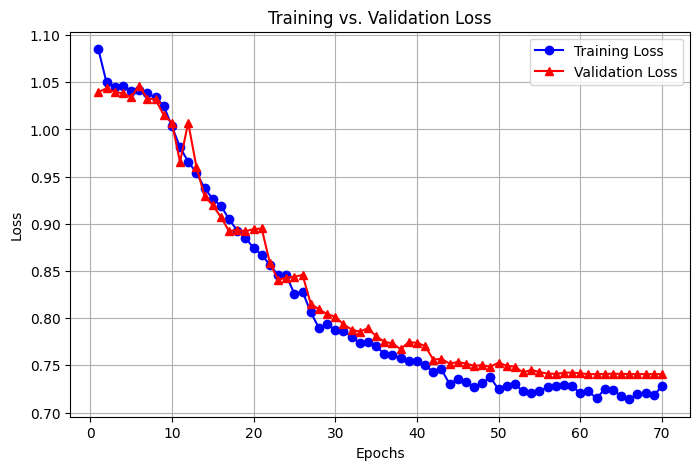

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' = blue circles with a solid line
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' = red triangles with a solid line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
X_test = np.stack(test_df['img_arr'].values)  # Convert list of arrays to numpy array
y_test = test_df['label'].values  # Extract labels

X_test = X_test.reshape(-1, 128, 128, 1)  # Reshape for CNN

X_test = X_test / 255.0

y_pred_prob = model.predict(X_test)  # Get probability scores
y_pred = np.argmax(y_pred_prob, axis=1)  # Get predicted class

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.6477
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.45      0.48       172
           1       0.00      0.00      0.00        15
           2       0.72      0.78      0.75       634
           3       0.58      0.56      0.57       459

    accuracy                           0.65      1280
   macro avg       0.45      0.45      0.45      1280
weighted avg       0.63      0.65      0.64      1280



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Data Augmentation with Transfer Learning

Model: "VGG16_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_01_for_aug (Lambda)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augment (Sequential)            │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ restore_to_255 (Lambda)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg_preprocess (Lambda)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,092 (56.64 MB)

 Trainable params: 133,380 (521.02 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

Model: "ResNet50_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_01_for_aug (Lambda)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augment (Sequential)            │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ restore_to_255 (Lambda)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_preprocess (Lambda)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,121,476 (92.02 MB)

 Trainable params: 529,668 (2.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)


===== Training VGG16 =====
Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 325ms/step - accuracy: 0.3316 - loss: 1.7666 - val_accuracy: 0.4648 - val_loss: 1.2568 - learning_rate: 1.0000e-04
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 329ms/step - accuracy: 0.4809 - loss: 1.3376 - val_accuracy: 0.4902 - val_loss: 1.0959 - learning_rate: 1.0000e-04
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 314ms/step - accuracy: 0.5083 - loss: 1.2791 - val_accuracy: 0.5332 - val_loss: 1.0256 - learning_rate: 1.0000e-04
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.5026 - loss: 1.2314 - val_accuracy: 0.5508 - val_loss: 0.9896 - learning_rate: 1.0000e-04
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - accuracy: 0.5248 - loss: 1.1596 - val_accuracy: 0.5742 - val_loss: 0.9669 - learning_rate: 1.0000e-04
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step - accuracy: 0.5432 - loss: 1.1030 - val_accuracy: 0.5908 - val_loss: 0.9476 - learning_rate: 1.0000e-04
Epoch 7/25
64/64 ━━━━━━━━━━━━━

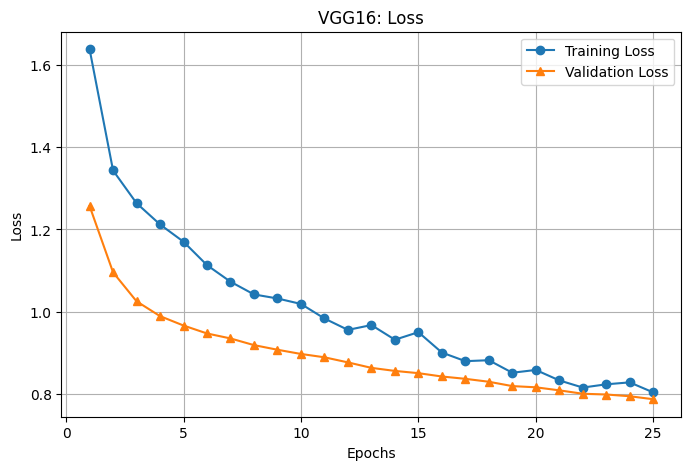

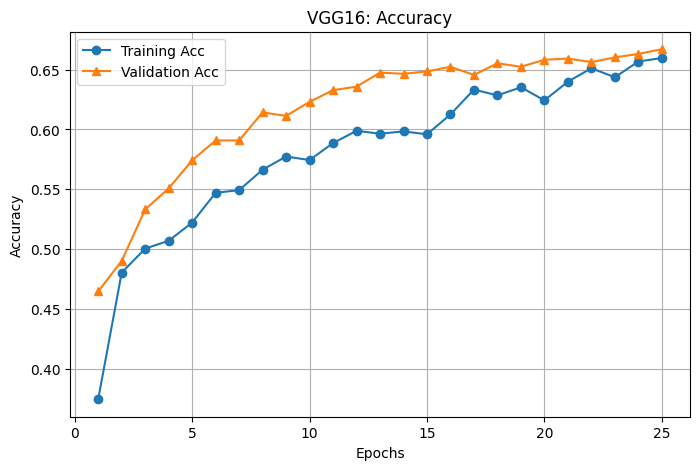


===== Training ResNet50 =====
Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 363ms/step - accuracy: 0.3173 - loss: 1.8936 - val_accuracy: 0.3955 - val_loss: 1.4372 - learning_rate: 1.0000e-04
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 323ms/step - accuracy: 0.5247 - loss: 1.2647 - val_accuracy: 0.5322 - val_loss: 1.1051 - learning_rate: 1.0000e-04
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - accuracy: 0.5375 - loss: 1.1663 - val_accuracy: 0.5879 - val_loss: 0.9727 - learning_rate: 1.0000e-04
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.5598 - loss: 1.1026 - val_accuracy: 0.5957 - val_loss: 0.9298 - learning_rate: 1.0000e-04
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.5909 - loss: 1.0582 - val_accuracy: 0.6123 - val_loss: 0.9040 - learning_rate: 1.0000e-04
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.5791 - loss: 1.0489 - val_accuracy: 0.6084 - val_loss: 0.8975 - learning_rate: 1.0000e-04
Epoch 7/25
64/64 ━━━━━━━━━━

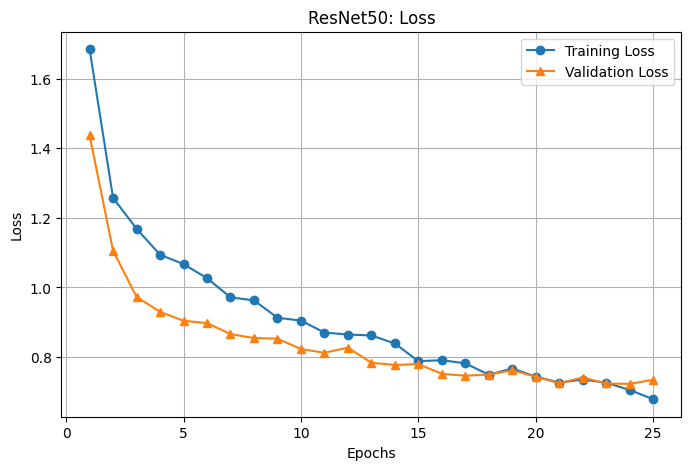

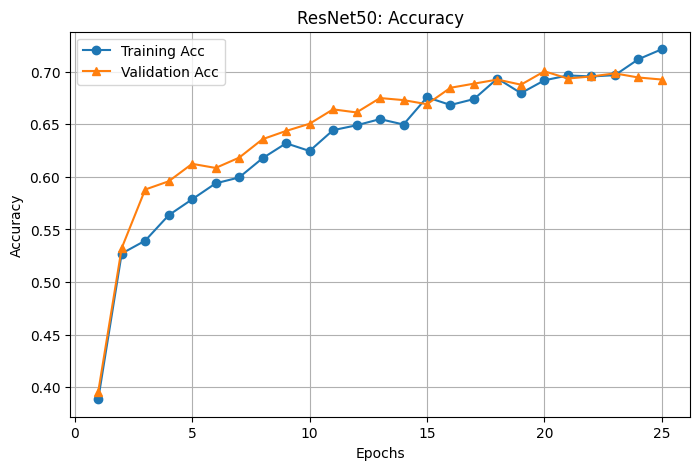

      Model  Val Loss  Val Acc  Precision  Recall  F1-score
0     VGG16    0.7881   0.6670     0.6552  0.6670    0.6587
1  ResNet50    0.7228   0.6943     0.7007  0.6943    0.6789


In [ ]:
# ===== Imports =====
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import random
import os

# ===== Reproducibility =====
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

# ===== Globals =====
num_classes = 4
input_size = (128, 128, 1)

# ===== Augmenter =====
def make_augmenter():
    """GPU-accelerated, training-only augmentations (Keras runs these only when training=True)."""
    return keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),
        layers.RandomTranslation(0.05, 0.05),
        layers.RandomContrast(0.1),
    ], name="augment")

# ===== Classification head =====
def _head(x, num_classes=4, dropout=0.5):
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = layers.Dropout(dropout)(x)
    return layers.Dense(num_classes, activation="softmax")(x)

# ===== Model builders with [0,1] -> augment -> *255 -> preprocess =====
def build_vgg16_transfer(input_shape=input_size, num_classes=num_classes, train_base=False, use_aug=True):
    inp = layers.Input(shape=input_shape, name="input_gray")

    # Gray -> RGB, then resize to backbone size
    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(224, 224, name="resize_224")(x)

    # Ensure [0,1] range for augmentation (if inputs are 0..255, scale down; if already 0..1, keep)
    x = layers.Lambda(lambda t: tf.where(tf.reduce_max(t) > 1.0, t/255.0, tf.cast(t, tf.float32)),
                      name="scale_to_01_for_aug")(x)

    # Augment (training-only)
    if use_aug:
        x = make_augmenter()(x)

    # Restore 0..255 for preprocess functions
    x = layers.Lambda(lambda t: t * 255.0, name="restore_to_255")(x)

    # VGG16 preprocessing (BGR + mean subtraction)
    x = layers.Lambda(vgg_preprocess, name="vgg_preprocess")(x)

    # Base
    base = VGG16(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    # Head
    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="VGG16_transfer")

    model.compile(
        optimizer=keras.optimizers.Adam(1e-4),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

def build_resnet50_transfer(input_shape=input_size, num_classes=num_classes, train_base=False, use_aug=True):
    inp = layers.Input(shape=input_shape, name="input_gray")

    x = layers.Lambda(lambda t: tf.image.grayscale_to_rgb(t), name="to_rgb")(inp)
    x = layers.Resizing(224, 224, name="resize_224")(x)

    x = layers.Lambda(lambda t: tf.where(tf.reduce_max(t) > 1.0, t/255.0, tf.cast(t, tf.float32)),
                      name="scale_to_01_for_aug")(x)

    if use_aug:
        x = make_augmenter()(x)

    x = layers.Lambda(lambda t: t * 255.0, name="restore_to_255")(x)

    x = layers.Lambda(resnet_preprocess, name="resnet_preprocess")(x)

    base = ResNet50(include_top=False, weights="imagenet")
    base.trainable = train_base
    x = base(x)

    out = _head(x, num_classes=num_classes)
    model = models.Model(inp, out, name="ResNet50_transfer")

    model.compile(
        optimizer=keras.optimizers.Adam(1e-4),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# ===== Training curves (robust to missing keys) =====
def _get_metric(history, key, fallback=None):
    if key in history.history: return history.history[key]
    if fallback and fallback in history.history: return history.history[fallback]
    return []

def plot_history(history, model_name):
    train_loss = _get_metric(history, 'loss')
    val_loss   = _get_metric(history, 'val_loss')
    train_acc  = _get_metric(history, 'accuracy', 'acc')
    val_acc    = _get_metric(history, 'val_accuracy', 'val_acc')

    max_len = max(len(train_loss), len(val_loss), len(train_acc), len(val_acc))
    if max_len == 0:
        print(f"[{model_name}] No history values to plot."); return

    # Loss
    plt.figure(figsize=(8, 5))
    if len(train_loss): plt.plot(range(1, len(train_loss)+1), train_loss, 'o-', label='Training Loss')
    if len(val_loss):   plt.plot(range(1, len(val_loss)+1),   val_loss,   '^-', label='Validation Loss')
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.title(f'{model_name}: Loss')
    plt.legend(); plt.grid(True); plt.show()

    # Accuracy
    if len(train_acc) or len(val_acc):
        plt.figure(figsize=(8, 5))
        if len(train_acc): plt.plot(range(1, len(train_acc)+1), train_acc, 'o-', label='Training Acc')
        if len(val_acc):   plt.plot(range(1, len(val_acc)+1),   val_acc,   '^-', label='Validation Acc')
        plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title(f'{model_name}: Accuracy')
        plt.legend(); plt.grid(True); plt.show()
    else:
        print(f"[{model_name}] No accuracy metrics found in history.")

# ===== Train + Plot + Evaluate helper =====
def train_and_evaluate(model, model_name, X_train, y_train, X_val, y_val,
                       epochs=25, batch_size=64, callbacks=None):
    print(f"\n===== Training {model_name} =====")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    # Plot curves
    plot_history(history, model_name)

    # Evaluate + metrics
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    y_pred = np.argmax(model.predict(X_val, batch_size=batch_size, verbose=0), axis=1)
    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)

    metrics = {
        "Model": model_name,
        "Val Loss": round(float(val_loss), 4),
        "Val Acc": round(float(val_acc), 4),
        "Precision": round(report["weighted avg"]["precision"], 4),
        "Recall": round(report["weighted avg"]["recall"], 4),
        "F1-score": round(report["weighted avg"]["f1-score"], 4),
    }
    return metrics, history

# ===== Build models (augmentation ON) =====
vgg_model    = build_vgg16_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False, use_aug=True)
resnet_model = build_resnet50_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False, use_aug=True)

# Optional: inspect
vgg_model.summary()
resnet_model.summary()

# ===== Callbacks =====
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
reduce_lr  = ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, min_lr=1e-7, verbose=1)

# ===== Train both models =====
metrics_vgg, hist_vgg = train_and_evaluate(
    vgg_model, "VGG16", X_train, y_train, X_val, y_val,
    epochs=25, batch_size=64, callbacks=[early_stop, reduce_lr]
)

metrics_resnet, hist_resnet = train_and_evaluate(
    resnet_model, "ResNet50", X_train, y_train, X_val, y_val,
    epochs=25, batch_size=64, callbacks=[early_stop, reduce_lr]
)

# ===== Aggregate results =====
results = [metrics_vgg, metrics_resnet]
df_results = pd.DataFrame(results)
print(df_results)


Model: "VGG16_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_01_for_aug (Lambda)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augment (Sequential)            │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ restore_to_255 (Lambda)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg_preprocess (Lambda)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,092 (56.64 MB)

 Trainable params: 133,380 (521.02 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 338ms/step - accuracy: 0.2569 - loss: 2.0397 - val_accuracy: 0.4004 - val_loss: 1.5390
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - accuracy: 0.4414 - loss: 1.4396 - val_accuracy: 0.5244 - val_loss: 1.1336
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 339ms/step - accuracy: 0.4796 - loss: 1.3119 - val_accuracy: 0.5693 - val_loss: 1.0084
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - accuracy: 0.5178 - loss: 1.2036 - val_accuracy: 0.5859 - val_loss: 0.9686
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - accuracy: 0.5502 - loss: 1.1355 - val_accuracy: 0.6064 - val_loss: 0.9347
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - accuracy: 0.5516 - loss: 1.1338 - val_accuracy: 0.6064 - val_loss: 0.9182
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.5781 - loss: 1.0526 - val_accuracy: 0.6094 - val_loss: 0.9018
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - accuracy: 0.5650 - loss: 1.0486 - val_accu

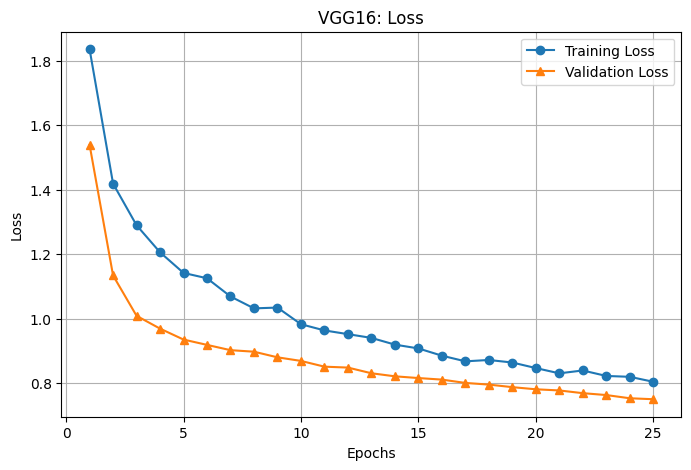

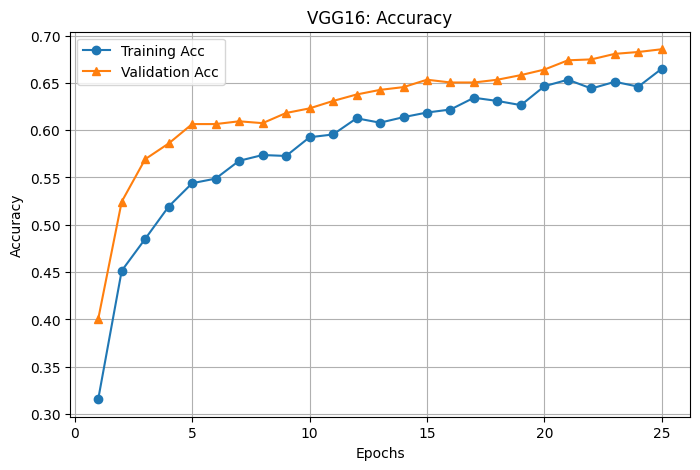

Model: "ResNet50_transfer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_gray (InputLayer)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_rgb (Lambda)                 │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize_224 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scale_to_01_for_aug (Lambda)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augment (Sequential)            │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ restore_to_255 (Lambda)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet_preprocess (Lambda)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,121,476 (92.02 MB)

 Trainable params: 529,668 (2.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 367ms/step - accuracy: 0.2952 - loss: 1.8943 - val_accuracy: 0.4668 - val_loss: 1.2333
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.4907 - loss: 1.3069 - val_accuracy: 0.5439 - val_loss: 1.0529
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 322ms/step - accuracy: 0.5496 - loss: 1.1649 - val_accuracy: 0.5547 - val_loss: 0.9755
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - accuracy: 0.5686 - loss: 1.0761 - val_accuracy: 0.5703 - val_loss: 0.9257
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.5743 - loss: 1.0693 - val_accuracy: 0.5830 - val_loss: 0.9040
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 305ms/step - accuracy: 0.6148 - loss: 0.9963 - val_accuracy: 0.5879 - val_loss: 0.8869
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.6004 - loss: 0.9816 - val_accuracy: 0.6064 - val_loss: 0.8731
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.6070 - loss: 0.9881 - val_accu

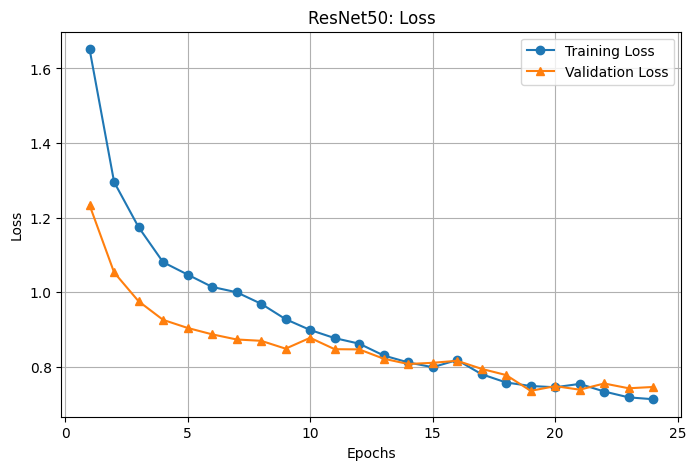

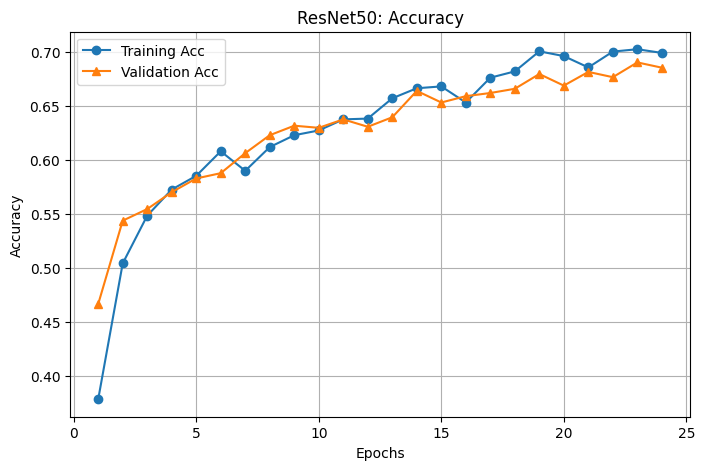

In [ ]:
# === Train VGG16 ===
vgg_model = build_vgg16_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
vgg_model.summary()

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history_vgg = vgg_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history_vgg, "VGG16")

# === Train ResNet50 ===
resnet_model = build_resnet50_transfer(input_shape=(128, 128, 1), num_classes=4, train_base=False)
resnet_model.summary()

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history_resnet = resnet_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history_resnet, "ResNet50")
